In [1]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train = np.array([
    [0.5, 1.5],
    [1, 1],
    [1.5, 0.5],
    [3, 0.5],
    [2, 2],
    [1, 2.5]
])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [3]:
X_train.shape

(6, 2)

In [4]:
y_train.shape

(6,)

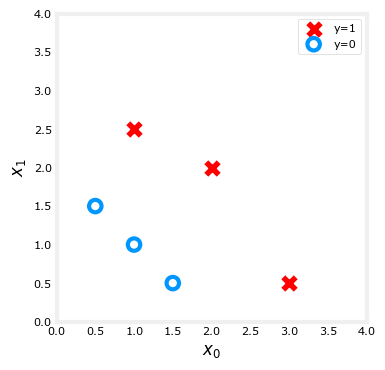

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_xlabel("$x_0$", fontsize=12)
ax.set_ylabel("$x_1$", fontsize=12)
plt.show()

In [6]:
def compute_gradient_descent_logistic(X, y , w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range (m):
        fwb_i = sigmoid(np.dot(X[i],w) + b)
        error_i = fwb_i - y[i]
        
        for j in range(n):
            dj_dw[j] += error_i * X[i,j]
        
        dj_db += error_i

    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw

In [7]:
X_tmp = np.array([[0.5,1.5], [1,1], [1.5,0.5], [3,0.5], [2,2], [1,2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2., 3.])
b_tmp = 1.

dj_db_tmp, dj_dw_tmp = compute_gradient_descent_logistic(
    X_tmp, y_tmp, w_tmp, b_tmp
)
print(f"dj_db_tmp = {dj_db_tmp}")
print(f"dj_dw_tmp = {dj_dw_tmp}")


dj_db_tmp = 0.49861806546328574
dj_dw_tmp = [0.49833339 0.49883943]


In [8]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_db, dj_dw = compute_gradient_descent_logistic(
            X, y, w, b
        )

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append(compute_cost_logistic(X, y, w, b))

        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}  ")

    return w, b, J_history    

In [10]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters)
print(f"\n updated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574  
Iteration 1000: Cost 0.1590977666870457  
Iteration 2000: Cost 0.08460064176930078  
Iteration 3000: Cost 0.05705327279402531  
Iteration 4000: Cost 0.04290759421682  
Iteration 5000: Cost 0.03433847729884557  
Iteration 6000: Cost 0.02860379802212006  
Iteration 7000: Cost 0.02450156960879306  
Iteration 8000: Cost 0.02142370332569295  
Iteration 9000: Cost 0.019030137124109114  

 updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


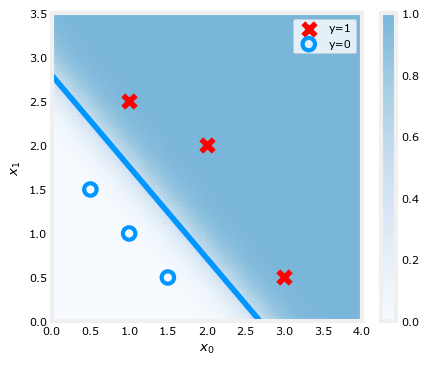

In [12]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
plt_prob(ax, w_out, b_out)

# plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train, y_train, ax)

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]

ax.plot([0,x0], [x1,0], c=dlc['dlblue'])
plt.show()


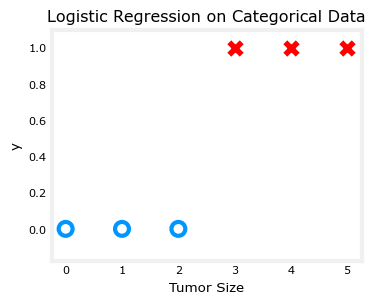

In [13]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

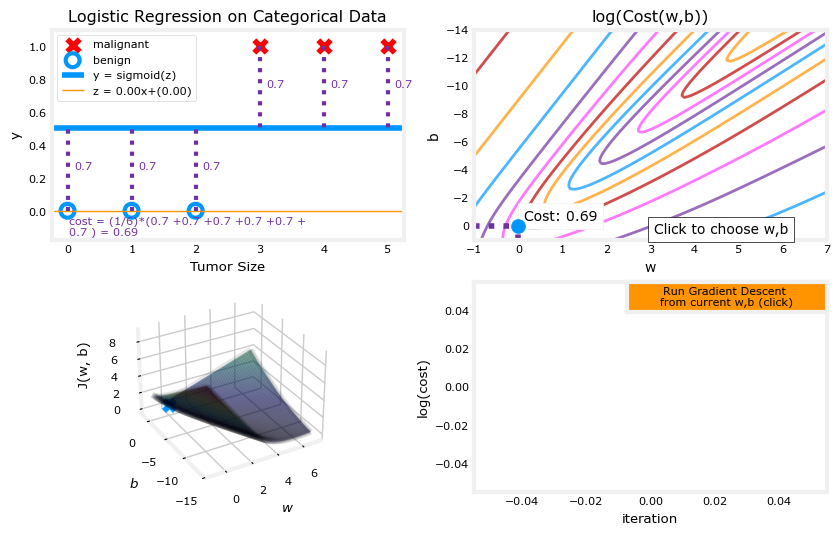

In [14]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic( x_train, y_train, w_range, b_range )